In [50]:
import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np

In [51]:
import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [113]:
# Check if CUDA is available
train_on_gpu = torch.cuda.is_available()
   
if train_on_gpu:
    print("CUDA is available! Training on GPU...")
else:
    print("CUDA is not available. Training on CPU...")

CUDA is available! Training on GPU...


In [53]:
raw_data_train = '/home/acaliba/CIFAR-10-images-master/train'
raw_data_test  = '/home/acaliba/CIFAR-10-images-master/test'

In [54]:
PATH = "/scratch/scholar/acaliba/CNN_model_CIFAR10"

## Train

In [55]:
dataset_train = []
labels_train  = []
targets_train = []

In [56]:
for folder in os.listdir(raw_data_train):
    print(folder)
    ## print( os.path.join(raw_data_train, folder) )
    for image in os.listdir( os.path.join(raw_data_train, folder) ):
        ## print(image)
        if folder not in labels_train:
            labels_train.append(folder)
        targets_train.append( labels_train.index(folder) )
        
        img_arr = imageio.imread( os.path.join(raw_data_train, folder, image), pilmode="RGB")
        ## resize = torchvision.transforms.Resize(size)
        ## crop_center = torchvision.transforms.CenterCrop(size)

        img = torch.from_numpy(img_arr).permute(2, 0, 1).float()
        ## img = resize(img)
        ## img = crop_center(img)
        img /= 255
        dataset_train.append(img)     

ship


/tmp/ipykernel_55622/2990888406.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread( os.path.join(raw_data_train, folder, image), pilmode="RGB")


dog
frog
automobile
cat
truck
airplane
deer
bird
horse


In [57]:
len(labels_train)

10

In [58]:
len( targets_train )

50000

In [59]:
dataset_train[1].shape

torch.Size([3, 32, 32])

In [60]:
data_train    = torch.stack(  dataset_train )
targets_train = torch.Tensor( targets_train ).type( torch.LongTensor )

torch.save( (data_train, targets_train, labels_train) , "CIFAR_train_dataset")

## data1, targets1, labels1 = torch.load(dataset_save)

In [61]:
data_train.shape

torch.Size([50000, 3, 32, 32])

In [62]:
targets_train.shape

torch.Size([50000])

In [63]:
data_train[2].shape

torch.Size([3, 32, 32])

In [64]:
targets_train[24000:25000]

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [65]:
img_tr = data_train[46000]
img_tr

tensor([[[0.0941, 0.0941, 0.0980,  ..., 0.3216, 0.1882, 0.2667],
         [0.0824, 0.0784, 0.0863,  ..., 0.2902, 0.1843, 0.2588],
         [0.1020, 0.1059, 0.1137,  ..., 0.2196, 0.1608, 0.2196],
         ...,
         [0.4784, 0.4863, 0.4941,  ..., 0.4980, 0.4941, 0.4941],
         [0.5059, 0.5098, 0.5176,  ..., 0.4863, 0.4863, 0.4863],
         [0.4510, 0.4510, 0.4549,  ..., 0.4471, 0.4431, 0.4431]],

        [[0.1373, 0.1373, 0.1412,  ..., 0.2588, 0.1059, 0.1725],
         [0.1098, 0.1137, 0.1216,  ..., 0.2353, 0.1137, 0.1804],
         [0.1137, 0.1255, 0.1333,  ..., 0.1765, 0.1020, 0.1569],
         ...,
         [0.4235, 0.4314, 0.4392,  ..., 0.4471, 0.4431, 0.4431],
         [0.4706, 0.4745, 0.4824,  ..., 0.4588, 0.4510, 0.4510],
         [0.4235, 0.4235, 0.4275,  ..., 0.4275, 0.4235, 0.4235]],

        [[0.1608, 0.1608, 0.1647,  ..., 0.2588, 0.1020, 0.1647],
         [0.1333, 0.1333, 0.1490,  ..., 0.2353, 0.1137, 0.1843],
         [0.1333, 0.1412, 0.1569,  ..., 0.2000, 0.1216, 0.

In [66]:
transform = T.ToPILImage()

In [67]:
img = transform( img_tr )

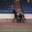

In [68]:
img

In [69]:
y_train_np = targets_train.numpy() 
y_train_np.shape

the_set = np.unique(  y_train_np  )
the_set

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

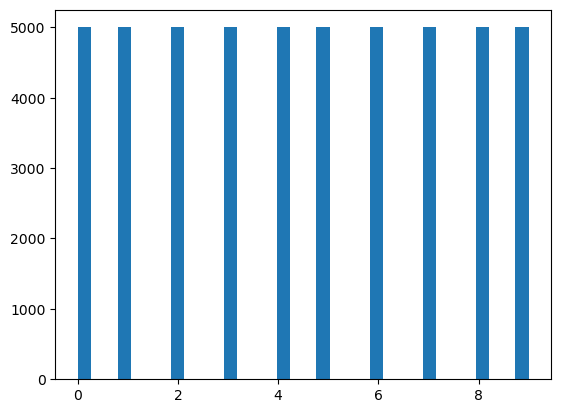

In [70]:
_ = plt.hist( targets_train.numpy(), bins="auto" )
plt.show()

In [71]:
dataset_test = []
labels_test  = []
targets_test = []

In [72]:
for folder in sorted( os.listdir( raw_data_test ) ):
    ## print(folder)
    for image in sorted( os.listdir( os.path.join(raw_data_test, folder) ) ):
        if folder not in labels_test:
            labels_test.append( folder )
        targets_test.append(  labels_test.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_test, folder, image), pilmode="RGB"  )
        
        img = torch.from_numpy( img_arr ).permute( 2, 0, 1 ).float()
        
        img /= 255
        dataset_test.append(img)

/tmp/ipykernel_55622/1150533069.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(  os.path.join(raw_data_test, folder, image), pilmode="RGB"  )


In [73]:
data_test = torch.stack(dataset_test)
targets_test = torch.Tensor(targets_test).type(torch.LongTensor)

torch.save((data_test, targets_test, labels_test), "InClass_CIFAR10_data_test")

In [74]:
data_test.shape

torch.Size([10000, 3, 32, 32])

In [75]:
targets_test.shape

torch.Size([10000])

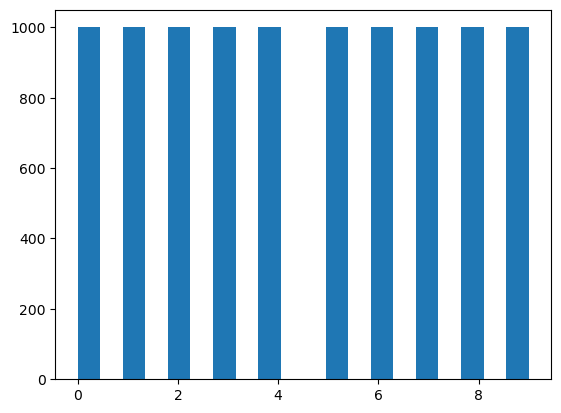

In [76]:
_ = plt.hist( targets_test.numpy(), bins="auto" )
plt.show()

In [77]:
X_train = data_train
y_train = targets_train

In [78]:
X_test = data_test
y_test = targets_test

In [79]:
X_train = X_train.numpy()
X_test  = X_test.numpy()

In [80]:
X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )

In [81]:
X_train = torch.from_numpy(X_train )
X_test = torch.from_numpy( X_test  )

In [82]:
img_norm_mean = (0.5, 0.5, 0.5)
img_norm_std = (0.5, 0.5, 0.5)

In [83]:
other_normalization = transforms.Compose([
                            ## transforms.ToTensor(),
                            transforms.Normalize( img_norm_mean, img_norm_std )
])

In [84]:
preprocess = transforms.Compose([
                 transforms.Resize(256),
                 transforms.CenterCrop(224),
                 transforms.ToTensor()
])


In [85]:
X_train = other_normalization( X_train )  

X_test  = other_normalization( X_test ) 


In [86]:
X_train.shape[0]

50000

In [87]:
y_train[30000].item()
type(y_train[30000].item())

int

In [88]:
y_train[30000].item()

6

In [89]:
X_train[78]

tensor([[[-0.2784, -0.2392, -0.1294,  ..., -0.3412, -0.3804, -0.4039],
         [-0.2471, -0.2235, -0.1216,  ..., -0.3412, -0.3725, -0.3961],
         [-0.2157, -0.1922, -0.1059,  ..., -0.3333, -0.3647, -0.3882],
         ...,
         [-0.4118, -0.3804, -0.3176,  ..., -0.6314, -0.6706, -0.7020],
         [-0.3882, -0.3725, -0.3176,  ..., -0.6000, -0.6471, -0.6784],
         [-0.4275, -0.4039, -0.3647,  ..., -0.5765, -0.6157, -0.6471]],

        [[ 0.1137,  0.0588,  0.0824,  ..., -0.0667, -0.1059, -0.1294],
         [ 0.1216,  0.0667,  0.0824,  ..., -0.0667, -0.0980, -0.1137],
         [ 0.1294,  0.0824,  0.0902,  ..., -0.0588, -0.0902, -0.1059],
         ...,
         [-0.0980, -0.0902, -0.0510,  ..., -0.2157, -0.2471, -0.2784],
         [-0.0980, -0.0745, -0.0510,  ..., -0.1922, -0.2235, -0.2549],
         [-0.1373, -0.1059, -0.0745,  ..., -0.1686, -0.2078, -0.2235]],

        [[ 0.7961,  0.7098,  0.7647,  ...,  0.3725,  0.3176,  0.2941],
         [ 0.8118,  0.7020,  0.7647,  ...,  0

In [90]:
CIFAR_train_list = [  ( X_train[i],  y_train[i].item() )  for i in range( X_train.shape[0]   )  ]

In [91]:
CIFAR_test_list = [  ( X_test[i],  y_test[i].item() )  for i in range( X_test.shape[0]   )  ]

In [92]:
batch_size = 16

In [93]:
train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size=batch_size, shuffle=True  )

In [94]:
test_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size=10000, shuffle=True  )

In [95]:
32*32*3

3072

In [114]:
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        
        # Convolutional layers
                            #Init_channels, channels, kernel_size, padding) 
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        # Pooling layers
        self.pool = nn.MaxPool2d(2,2)
        
        # FC layers
        # Linear layer (64x4x4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        
        # Linear Layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        
        # Dropout layer
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        x = self.pool(F.elu(self.conv1(x)))
        x = self.pool(F.elu(self.conv2(x)))
        x = self.pool(F.elu(self.conv3(x)))
        
        # Flatten the image
        x = x.view(-1, 64*4*4)
        x = self.dropout(x)
        x = F.elu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNNNet()
print(model)

# Move tensors to GPU is CUDA is available
if train_on_gpu:
    model.cuda()
      

CNNNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [115]:
def training_loop( N_Epochs, model, loss_fn, opt ):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            xb = xb.view(  (16, -1 ) )
            
            y_pred = model(xb)
            
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        if epoch % 5 == 0:
            print(epoch, "loss=", loss)
            new_PATH = PATH + str(epoch)
            print( new_PATH )
            torch.save(model, new_PATH)

In [116]:
N_Epochs      = 50
learning_rate = 0.001

In [117]:
model = CNNNet()

opt = torch.optim.Adam(  model.parameters(), lr=learning_rate  )

loss_fn = nn.CrossEntropyLoss()

In [118]:
training_loop( N_Epochs, model, loss_fn, opt )

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [16, 3072]

NameError: name 'n_epochs' is not defined

In [101]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

In [102]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        x_real = x_real.view(  (batch_size, -1 ) )
        
        y_pred = model(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.06
Confusion Matrix:
[[  0 673   0 207   0 119   0   0   0   1]
 [  0 369   0 326   0 302   0   0   0   3]
 [  0 755   0  41   0 199   0   0   0   5]
 [  0 722   0  60   0 215   0   0   0   3]
 [  0 711   0  43   0 241   0   0   0   5]
 [  0 796   0  35   0 168   0   0   0   1]
 [  0 679   0  56   0 259   0   0   0   6]
 [  0 550   0  72   0 355   0   0   0  23]
 [  0 436   0 383   0 180   0   0   0   1]
 [  0 199   0 341   0 459   0   0   0   1]]
Precision: 0.019
Recall: 0.060
F1-measure: 0.025


/apps/cent7/anaconda/2024.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
